In [69]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
# https://www.kaggle.com/datasets/kartik2112/fraud-detection
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv'
df = pd.read_csv(file_url)

In [71]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0


In [72]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

* trans_date_trans_time : 거래시간
* cc_num : 카드 번호. 고유값이기 때문에 여기서는 id 처럼 사용할 수 있음
* merchant : 거래 상점
* category : 거래 상점의 범주(애완용품, 여행, 엔터테인먼트 등)
* amt : 거래 금액 (amount)
* first/ last : 이름 
* gender : 성별
* street / state / zip : 고객 거주지 정보
* lat / long : 고객주소에 대한 위도 및 경도
* city_pop : 고객의 zipcode 속하는 인구 수
* job : 직업
* dob : 생년월일
* trans_num : 거래번호
* unix_time : 거래시간 (유닉스 타임스탬프)
* merch_lat / merch_long : 상점의 위경도
---
* is_fraud : 사기거래 여부 (이상거래 여부) -> 종속변수

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [74]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00,1852394.00
mean,417386038393710400.00,70.06,48813.26,38.54,-90.23,88643.67,1358674218.83,38.54,-90.23,0.01
std,1309115265318734848.00,159.25,26881.85,5.07,13.75,301487.62,18195081.39,5.11,13.76,0.07
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.64,26237.00,34.67,-96.80,741.00,1343016823.75,34.74,-96.90,0.00
50%,3521417320836166.00,47.45,48174.00,39.35,-87.48,2443.00,1357089331.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.10,72042.00,41.94,-80.16,20328.00,1374581485.25,41.96,-80.25,0.00
max,4992346398065154048.00,28948.90,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


## 전처리

In [75]:
# 사용되지 않는 변수 제거
df.drop(['first', 'last',                   # 이름
         'street', 'city', 'state', 'zip',  # 주소
         'trans_num', 'unix_time',          # 거래번호 / 유닉스타임 (중복)
         'job', 'merchant'                  # 직업, 가게
         ], axis=1, inplace=True)

In [76]:
# 날짜 형태의 데이터 Object 문자열로 저장되어있다
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   lat                    float64       
 6   long                   float64       
 7   city_pop               int64         
 8   dob                    object        
 9   merch_lat              float64       
 10  merch_long             float64       
 11  is_fraud               int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 169.6+ MB


### 피쳐 엔지니어링
* 원래 고객의 거래 패턴에서 벗어나는 거래



### 결제 금액


In [77]:
# Z 점수 (정규분포) <- (x - 평균) / 표준편차
# amt_info = df.groupby('cc_num').agg(['mean', 'std'])
# cc_num : 카드번호별 그룹을 묶어서 agg -> 여러 그룹함수(여러개의 값들을 통해 계산하는 통계값)
# mean : 평균 / std : 표준편차 -> amt(결제 금액) -> cc_num
amt_info = df.groupby('cc_num').agg(['mean', 'std']).amt.reset_index()
amt_info

,cc_num,mean,std
0,60416207185,59.26,142.87
1,60422928733,65.48,92.04
2,60423098130,96.38,1000.69
3,60427851591,107.49,131.01
4,60487002085,64.10,153.21
...,...,...,...
994,4958589671582726883,67.21,137.50
995,4973530368125489546,75.79,258.85
996,4980323467523543940,70.71,119.90
997,4989847570577635369,93.01,128.40


In [78]:
# A.merge(B, on = KEY, how = WAY)
# A라는 데이터프레임에 B를 합쳐주겠다 => index -> cc_num
# LEFT
df = df.merge(amt_info, on = 'cc_num', how = 'left')

In [79]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'lat',
       'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'is_fraud',
       'mean', 'std'],
      dtype='object')

In [80]:
df[['cc_num', 'amt', 'mean', 'std']].head()

,cc_num,amt,mean,std
0,2703186189652095,4.97,89.41,127.53
1,630423337322,107.23,56.08,159.20
2,38859492057661,220.11,69.92,116.69
3,3534093764340240,45.00,80.09,280.08
4,375534208663984,41.96,95.34,94.32


In [81]:
# (x - 평균) / 표준편차
df['amt_z_score'] = (df['amt'] - df['mean']) / df['std']

In [82]:
df['amt_z_score'].head()

0   -0.66
1    0.32
2    1.29
3   -0.13
4   -0.57
Name: amt_z_score, dtype: float64

In [83]:
df.drop(['mean', 'std'], axis=1, inplace=True)

### 범주별 결제 금액

In [84]:
# 결제를 한 사람의 카드번호 / 결제가 일어난 상점의 종류(분류)
# agg -> 그룹을 대상으로 통계값... 그룹함수
# mean : 평균 / std : 표준편차 
category_info = df.groupby(['cc_num', 'category']).agg(['mean', 'std'])['amt'].reset_index()

In [85]:
category_info.head()

,cc_num,category,mean,std
0,60416207185,entertainment,51.84,65.49
1,60416207185,food_dining,26.74,46.38
2,60416207185,gas_transport,59.78,15.76
3,60416207185,grocery_net,52.15,17.69
4,60416207185,grocery_pos,101.56,21.89


In [86]:
# cc_num, category -> merge. / mean, std => z_score / mean, std? drop
df = df.merge(category_info, on=['cc_num', 'category'], how='left')
df[['cc_num', 'category', 'amt', 'mean', 'std']].head()

,cc_num,category,amt,mean,std
0,2703186189652095,misc_net,4.97,84.86,116.07
1,630423337322,grocery_pos,107.23,99.64,23.90
2,38859492057661,entertainment,220.11,46.65,60.39
3,3534093764340240,gas_transport,45.00,61.54,15.75
4,375534208663984,misc_pos,41.96,35.48,4.93


In [87]:
df['cat_z_score'] = (df['amt'] - df['mean']) / df['std']

In [88]:
df['cat_z_score'].head()

0   -0.69
1    0.32
2    2.87
3   -1.05
4    1.31
Name: cat_z_score, dtype: float64

In [89]:
import geopy.distance

In [90]:
# 두 지점간의 거리 (위도, 경도)
# geopy.distance.distance((lat1, lng1), (lat2, lng2))

In [91]:
# coordinate 좌표(위, 경도)
# 1. 상점의 위치 (merchant)
# 2. 고객의 위치 (customer)
df['merch_coord'] = pd.Series(zip(df.merch_lat, df.merch_long))
df['cust_coord'] = pd.Series(zip(df['lat'], df['long']))

In [92]:
df['distance'] = df.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1)

In [93]:
df2 = df.copy()

In [94]:
df2.distance

0          78.77
1          30.22
2         108.10
3          95.69
4          77.70
           ...  
1852389    77.03
1852390   100.02
1852391    80.89
1852392    53.06
1852393    72.38
Name: distance, Length: 1852394, dtype: float64

In [95]:
# .km 빼먹으면 -> 단위를 포함해서 object -> object => float
# df['distance'] = df['distance'].str.split(expand=True)[0].astype('float64')

In [96]:
distance_info = df.groupby('cc_num').agg(['mean', 'std'])['distance'].reset_index()

In [98]:
df = df.merge(distance_info, on = 'cc_num', how='left')
df['distance_z_score'] = (df['distance'] - df['mean']) / df['std']

In [99]:
df.drop(['mean', 'std'], axis=1, inplace=True)

In [100]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,...,amt_z_score,mean_x,std_x,cat_z_score,merch_coord,cust_coord,distance,mean_y,std_y,distance_z_score
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.08,-81.18,3495,1988-03-09,36.01,...,-0.66,84.86,116.07,-0.69,"(36.011293, -82.048315)","(36.0788, -81.1781)",78.77,77.84,30.07,0.03
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.89,-118.21,149,1978-06-21,49.16,...,0.32,99.64,23.90,0.32,"(49.159047, -118.186462)","(48.8878, -118.2105)",30.22,71.66,28.09,-1.48
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.18,-112.26,4154,1962-01-19,43.15,...,1.29,46.65,60.39,2.87,"(43.150704, -112.154481)","(42.1808, -112.262)",108.10,74.58,28.88,1.16
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.23,-112.11,1939,1967-01-12,47.03,...,-0.13,61.54,15.75,-1.05,"(47.034331, -112.561071)","(46.2306, -112.1138)",95.69,72.05,28.89,0.82
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.42,-79.46,99,1986-03-28,38.67,...,-0.57,35.48,4.93,1.31,"(38.674999, -78.632459)","(38.4207, -79.4629)",77.70,75.84,29.15,0.06


In [101]:
df.isna().mean()

trans_date_trans_time   0.00
cc_num                  0.00
category                0.00
amt                     0.00
gender                  0.00
lat                     0.00
long                    0.00
city_pop                0.00
dob                     0.00
merch_lat               0.00
merch_long              0.00
is_fraud                0.00
amt_z_score             0.00
mean_x                  0.00
std_x                   0.00
cat_z_score             0.00
merch_coord             0.00
cust_coord              0.00
distance                0.00
mean_y                  0.00
std_y                   0.00
distance_z_score        0.00
dtype: float64

In [102]:
df['age'] = 2021 - pd.to_datetime(df['dob']).dt.year # 만 나이

In [103]:
df.drop(['cc_num', 'lat', 'long',
         'merch_lat', 'merch_long', 'dob',
         'merch_coord', 'cust_coord'], axis=1, inplace=True)

In [104]:
df = pd.get_dummies(df, columns = ['category', 'gender'], drop_first=True)

In [105]:
df

,trans_date_trans_time,amt,city_pop,is_fraud,amt_z_score,mean_x,std_x,cat_z_score,distance,mean_y,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-01-01 00:00:18,4.97,3495,0,-0.66,84.86,116.07,-0.69,78.77,77.84,...,0,0,0,1,0,0,0,0,0,0
1,2019-01-01 00:00:44,107.23,149,0,0.32,99.64,23.90,0.32,30.22,71.66,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:00:51,220.11,4154,0,1.29,46.65,60.39,2.87,108.10,74.58,...,0,0,0,0,0,0,0,0,0,1
3,2019-01-01 00:01:16,45.00,1939,0,-0.13,61.54,15.75,-1.05,95.69,72.05,...,0,0,0,0,0,0,0,0,0,1
4,2019-01-01 00:03:06,41.96,99,0,-0.57,35.48,4.93,1.31,77.70,75.84,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,43.77,519,0,-0.17,45.93,45.15,-0.05,77.03,75.52,...,1,0,0,0,0,0,0,0,0,1
1852390,2020-12-31 23:59:09,111.84,28739,0,0.36,50.92,52.34,1.16,100.02,79.17,...,0,0,1,0,0,0,0,0,0,1
1852391,2020-12-31 23:59:15,86.88,3684,0,-0.02,63.86,52.31,0.44,80.89,72.66,...,0,0,1,0,0,0,0,0,0,0
1852392,2020-12-31 23:59:24,7.99,129,0,-0.59,8.19,27.24,-0.01,53.06,73.69,...,0,0,0,0,0,0,0,0,1,1


In [106]:
df.set_index('trans_date_trans_time', inplace=True)

In [107]:
df.index # 2020-07-01

DatetimeIndex(['2019-01-01 00:00:18', '2019-01-01 00:00:44',
               '2019-01-01 00:00:51', '2019-01-01 00:01:16',
               '2019-01-01 00:03:06', '2019-01-01 00:04:08',
               '2019-01-01 00:04:42', '2019-01-01 00:05:08',
               '2019-01-01 00:05:18', '2019-01-01 00:06:01',
               ...
               '2020-12-31 23:57:18', '2020-12-31 23:57:50',
               '2020-12-31 23:57:56', '2020-12-31 23:58:04',
               '2020-12-31 23:58:34', '2020-12-31 23:59:07',
               '2020-12-31 23:59:09', '2020-12-31 23:59:15',
               '2020-12-31 23:59:24', '2020-12-31 23:59:34'],
              dtype='datetime64[ns]', name='trans_date_trans_time', length=1852394, freq=None)

In [108]:
train = df[df.index < '2020-07-01']
test = df[df.index >= '2020-07-01']

In [109]:
X_train = train.drop('is_fraud', axis=1)
y_train = train['is_fraud']
X_test = test.drop('is_fraud', axis=1)
y_test = test['is_fraud']

In [110]:
import lightgbm as lgb

In [111]:
model = lgb.LGBMClassifier(random_state=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9966898818820494

In [113]:
1- df.is_fraud.mean()

0.9947899852839083

In [114]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [115]:
def confusion_matrix_view(y_test, pred):
    cf_matrix = confusion_matrix(y_test, pred)
    print(cf_matrix)
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

In [116]:
# 정밀도(1종오류), 재현도(2종오류), f1-점수(전체)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.57      0.56      0.56      2012

    accuracy                           1.00    525661
   macro avg       0.78      0.78      0.78    525661
weighted avg       1.00      1.00      1.00    525661



In [117]:
# 0, 1 -> 분류되기 전에 얼마나 가까운지? -> 0.5? 0.4? (확룰)
proba = model.predict_proba(X_test)
proba
# 각행 -> 입력받은 test 별로
# 1열 : 0에 대한 예측값
# 2열 : 1에 대한 예측값 <- 이상거래 여부

array([[9.99996869e-01, 3.13110339e-06],
       [9.99995652e-01, 4.34821175e-06],
       [9.99977087e-01, 2.29129433e-05],
       ...,
       [9.99829065e-01, 1.70935364e-04],
       [9.99965924e-01, 3.40759770e-05],
       [9.99839143e-01, 1.60857210e-04]])

In [118]:
proba[:, 1] # 모든 행의 2열을 불러옴 -> 1에 대한 예측값 (이상거래 여부)

array([3.13110339e-06, 4.34821175e-06, 2.29129433e-05, ...,
       1.70935364e-04, 3.40759770e-05, 1.60857210e-04])

In [119]:
proba = proba[:, 1]

In [120]:
# default : 0.5 -> 크면은 1로 쳐주자
# case1 : 0.2 더 헐겁게 하자
# case2 : 0.8 엄격하게 하자
# T/F -> 1/0 -> int -> 1.0.10....
proba_int1 = (proba > 0.2).astype('int')
proba_int2 = (proba > 0.8).astype('int')

[[522794    855]
 [   885   1127]]


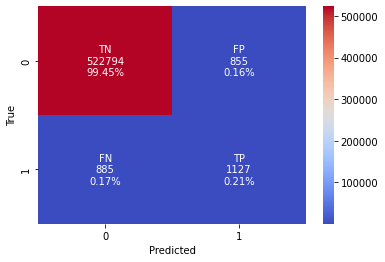

In [121]:
confusion_matrix_view(y_test, pred)

[[520463   3186]
 [   653   1359]]


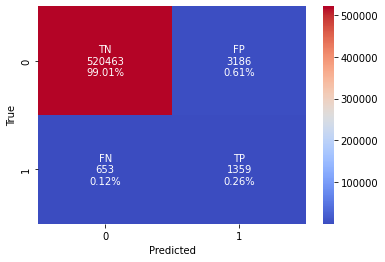

In [122]:
# 0.2 -> 1종오류는 늘고, 2종오류는 줄었어요
confusion_matrix_view(y_test, proba_int1)

[[523015    634]
 [  1076    936]]


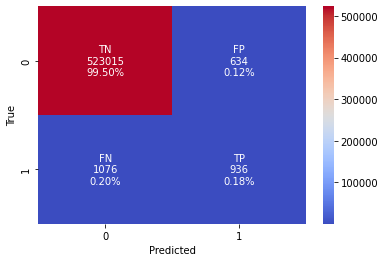

In [123]:
# 0.8 -> 2종오류는 늘고, 1종오류는 줄었어요
confusion_matrix_view(y_test, proba_int2)

In [124]:
# 0과 1을 얼마나 잘 분리하는지 
roc_auc_score(y_test, proba)

0.9074027464111786

## 랜덤 그리드 서치
* 그리드 서치 : 모든 조합에 대해서 모델링
* 랜덤 그리드 서치 : 더 넓은 영역의 하이퍼 파라미터 값을 더 짧은 시간에 다양하게 활용 -> 일부만 추출해서 하기 때문에 <- 더 짧은 시간

In [125]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
params = {
    "n_esimators": [100, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "lambda_l1": [0, 10, 20, 30, 50],
    "lambda_l2": [0, 10, 20, 30, 50],
    "max_depth": [5, 10, 15, 20],
    "subsmaple": [0.6, 0.8, 1]
}

In [127]:
model2 = lgb.LGBMClassifier(random_state=100)
rs = RandomizedSearchCV(model2, param_distributions=params, n_iter=30, 
                        scoring='roc_auc', random_state=100, n_jobs=-1)

In [128]:
import time
start = time.time() # 시작시간 설정
rs.fit(X_train, y_train)
print(time.time() - start)

1188.7623813152313


In [129]:
rs.best_params_

{'subsmaple': 1,
 'n_esimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.05,
 'lambda_l2': 20,
 'lambda_l1': 0}

In [130]:
rs_proba = rs.predict_proba(X_test)

In [131]:
roc_auc_score(y_test, rs_proba[:, 1])

0.9946148732214039

[[522396   1253]
 [   436   1576]]


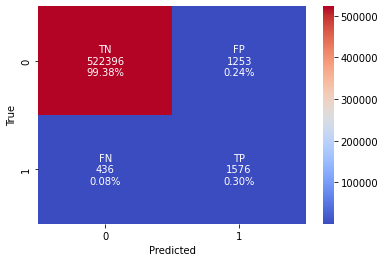

In [132]:
rs_proba_int = (rs_proba[:, 1] > 0.2).astype('int')
confusion_matrix_view(y_test, rs_proba_int)

[[520463   3186]
 [   653   1359]]


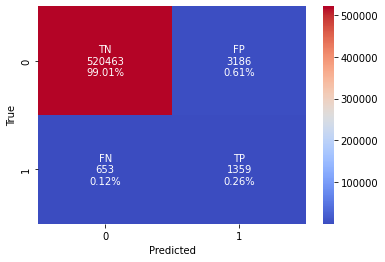

In [133]:
confusion_matrix_view(y_test, proba_int1)

## train() 함수
* model.fit(X_train, y_train) => 학습
* model.train. <- fit.
---
||train|fit|
|-|-|-|
|검증셋|모델링 - 검증셋|검증 X|
|데이터셋|데이터프레임->별도포맷변환|데이터프레임,시리즈|
|하이퍼패러미터|하이퍼패러미터 Default X|기본값|
|사이킷런 연동|X|O(그리드 서치...)|

학습 -> 학습셋 => model => 시험셋
학습 -> 학습셋과는 별개로 (검증셋) => model

In [134]:
# 훈련셋 / 시험셋 (fit)
# 훈련셋 / 검증셋 / 시험셋 (train)
train = df[df.index < '2020-01-01']
val = df[(df.index >= '2020-01-01') & (df.index < '2020-07-01')]
test = df[df.index >= '2020-07-01']

In [135]:
def get_X_y(df):
    X = df.drop('is_fraud', axis=1)
    y = df.is_fraud
    return (X, y)

In [136]:
X_train, y_train = get_X_y(train)
X_val, y_val = get_X_y(val)
X_test, y_test = get_X_y(test)

In [137]:
# 데이터셋 변환
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)

In [138]:
param_set = rs.best_params_
param_set['metrics'] = 'auc'

In [139]:
param_set

{'subsmaple': 1,
 'n_esimators': 1000,
 'max_depth': 15,
 'learning_rate': 0.05,
 'lambda_l2': 20,
 'lambda_l1': 0,
 'metrics': 'auc'}

In [140]:
model_train = lgb.train(param_set, d_train, valid_sets=[d_val],
                        # early_stopping_rounds : 학습시간을 제한
                        # verbose_eval : 중간결과를 특정 간격으로 출력
                        early_stopping_rounds=500, verbose_eval=100)

Training until validation scores don't improve for 500 rounds.
[100]	valid_0's auc: 0.970751
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.970751


In [141]:
pred_train = model_train.predict(X_test)

In [142]:
roc_auc_score(y_test, pred_train)

0.9618804515630067

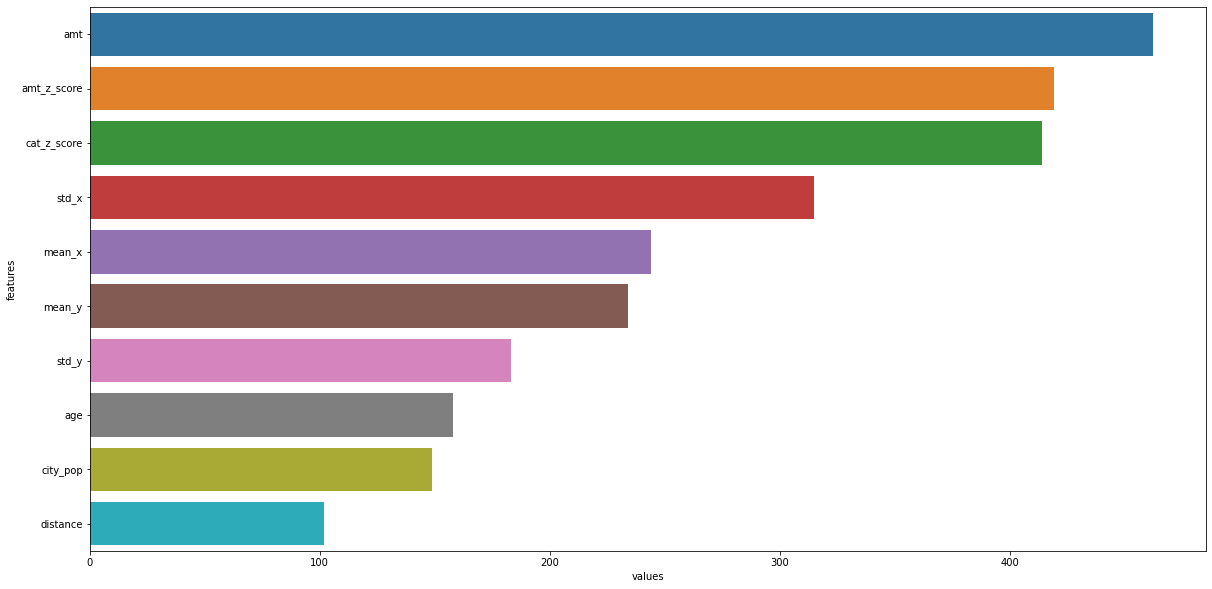

In [144]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data=feature_imp.sort_values(by='values', ascending=False).head(10))